#**Universidad Galileo**
##Statistical Learning II Tarea No 4
###César Luis Polanco
###20062088


Igorando el sesgo/bias y asumiendo activación sigmoidal implementar la siguiente red neuronal en NumPy

https://gadictos.com/neural-network-pt1/
<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

sigmoid(np.array([2,3,4]))

array([0.88079708, 0.95257413, 0.98201379])

In [ ]:
Wc1 = np.array([
   [0.9,0.3,0.2],
   [0.8,0.5,0.4],
   [0.1,0.6,0.7]
])

In [ ]:
Wc2 = np.array([0.3,0.5,0.9])

In [ ]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

### Forward-propagation(inferencia, prediccion, o estimacion)


In [ ]:
H = np.matmul(X,Wc1)

In [ ]:
X.shape

(4, 3)

In [ ]:
Wc1.shape

(3, 3)

In [ ]:
H.shape

(4, 3)

In [ ]:
H

array([[ 1. ,  0.9,  0.9],
       [ 2.8,  3.1,  3.1],
       [ 8.2,  7.3,  7. ],
       [11.8, 10.1,  9.6]])

In [ ]:
A = sigmoid(H)

In [ ]:
A

array([[0.73105858, 0.7109495 , 0.7109495 ],
       [0.94267582, 0.95689275, 0.95689275],
       [0.99972542, 0.99932492, 0.99908895],
       [0.9999925 , 0.99995892, 0.99993228]])

In [ ]:
y_aprox = sigmoid(np.matmul(
    A,Wc2
))

In [ ]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

In [ ]:
def g(X):
  return sigmoid(np.matmul(X,Wc1))

In [ ]:
def f(g):
  return sigmoid(np.matmul(g,Wc2))

In [ ]:
y_aprox = f(g(X))

In [ ]:
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

#### Orientado a objetos

In [34]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
                         [0.8, 0.4, 0.3],
                         [0.2, 0.9, 0.5]
    ])

    self.Wc2 = np.array([0.3, 0.5, 0.9])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1))
    y_aprox = sigmoid(np.matmul(A,self.Wc2))

    return A,y_aprox

In [35]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

In [37]:
NeuralNet = RedNeuronal()
A,NeuralNet = NeuralNet.forward_propagation(X)

In [40]:
print('Capa intermedia: \n', A, '\n')
print('Capa con mayor presencia: \n', np.max(A[:,:2], axis=1), '\n')
print('y aproximado: \n', NeuralNet)

Capa intermedia: 
 [[0.73105858 0.78583498 0.68997448]
 [0.76852478 0.90024951 0.78583498]
 [0.98522597 0.99776215 0.97587298]
 [0.99797468 0.99983344 0.9950332 ]] 

Capa con mayor presencia: 
 [0.78583498 0.90024951 0.99776215 0.99983344] 

y aproximado: 
 [0.77438027 0.80026216 0.84194007 0.84485948]


<img src="https://i.imgur.com/IDFRq5a.png">

[0.73105858 0.78583498 0.68997448]

In [30]:
class RedNeuronal:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [0.8,0.2],
        [0.4,0.9],
        [0.3,0.5]    
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    print(X.shape)
    print(self.Wc1.T.shape)
    A = sigmoid(np.matmul(X,self.Wc1.T)) # 1 fila por observacion, 1 columna por representacion intermedia [4,3]
    print(A)
    print(A.shape)
    y_aprox = sigmoid(np.matmul(A,self.Wc2)) # 1 fila por observacion,  1 unica salida [4,1]
    print(y_aprox.shape)
    return y_aprox

In [31]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

In [32]:
red = RedNeuronal()
y_aprox = red.forward_propagation(X)

(4, 2)
(2, 3)
[[0.73105858 0.78583498 0.68997448]
 [0.76852478 0.90024951 0.78583498]
 [0.98522597 0.99776215 0.97587298]
 [0.99797468 0.99983344 0.9950332 ]]
(4, 3)
(4,)


In [33]:
y_aprox

array([0.77438027, 0.80026216, 0.84194007, 0.84485948])

## Sigmoid

In [41]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
                         [5, 7],
                         [-2, -3],
                         [-8, 1]
    ])

    self.Wc2 = np.array([7, 5, -6])

  def forward_propagation(self,X):
    X = np.c_[X, np.ones(X.shape[0])]
    A = sigmoid(np.matmul(X,self.Wc1))
    A = np.c_[A, np.ones(A.shape[0])]

    y_aprox = sigmoid(np.matmul(A,self.Wc2))

    return A, y_aprox

In [42]:
# 4 observaciones, 2 variables
X = np.array([
      [1, 1],
      [1, 2],
      [4, 5],
      [6, 7],
])

In [44]:
NeuralNet2 = RedNeuronal()
A, NeuralNet2 = NeuralNet2.forward_propagation(X)

print('Capa intermedia: \n', A, '\n')
print('Capa con mayor presencia: \n', np.max(A[:,:2], axis=1), '\n')
print('y aproximado: \n', NeuralNet2)

Capa intermedia: 
 [[6.69285092e-03 9.93307149e-01 1.00000000e+00]
 [9.11051194e-04 8.80797078e-01 1.00000000e+00]
 [8.80797078e-01 9.99999168e-01 1.00000000e+00]
 [9.99664650e-01 1.00000000e+00 1.00000000e+00]] 

Capa con mayor presencia: 
 [0.99330715 0.88079708 0.99999917 1.        ] 

y aproximado: 
 [0.27158134 0.16943494 0.99432264 0.99752158]


## XOR

In [50]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
                         [20, -20],
                         [20, -20]
    ])

    self.B1 = np.array([-10, 30])

    self.Wc2 = np.array([20, 20])

    self.B2 = np.array([-30])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1) + self.B1)
    y_aprox = sigmoid(np.matmul(A,self.Wc2) + self.B2)

    return A, y_aprox

In [51]:
# 4 observaciones, 2 variables
X = np.array([
      [1, 1],
      [1, 0],
      [0, 1],
      [0, 0],
])

In [53]:
NeuralNet3 = RedNeuronal()
A, NeuralNet3 = NeuralNet3.forward_propagation(X)

print('Capa intermedia: \n', A, '\n')
print('Capa con mayor presencia: \n', np.max(A[:,:2], axis=1), '\n')
print('y aproximado: \n', NeuralNet3)

Capa intermedia: 
 [[1.00000000e+00 4.53978687e-05]
 [9.99954602e-01 9.99954602e-01]
 [9.99954602e-01 9.99954602e-01]
 [4.53978687e-05 1.00000000e+00]] 

Capa con mayor presencia: 
 [1.        0.9999546 0.9999546 1.       ] 

y aproximado: 
 [4.54391049e-05 9.99954520e-01 9.99954520e-01 4.54391049e-05]


## Graficar XOR

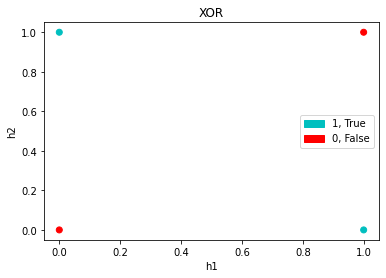

In [66]:
colors = np.where(np.prod(A, axis=1) > 0.5, 'c', 'r')
true = mpatches.Patch(color='c', label='1, True')
false = mpatches.Patch(color='r', label='0, False')

plt.scatter(X[:,0], X[:,1], color=colors)
plt.title("XOR")
plt.xlabel('h1')
plt.ylabel('h2')
plt.legend(handles=[true, false])
plt.show()

## Capa intermedia

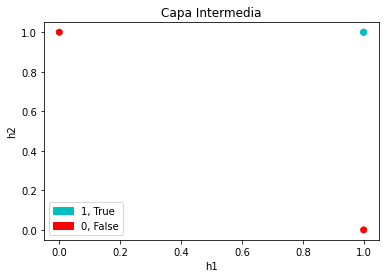

In [67]:
colors = np.where(np.prod(A, axis=1) > 0.5, 'c', 'r')
true = mpatches.Patch(color='c', label='1, True')
false = mpatches.Patch(color='r', label='0, False')

plt.scatter(A[:,0], A[:,1], color=colors)
plt.title("Capa Intermedia")
plt.xlabel('h1')
plt.ylabel('h2')
plt.legend(handles=[true, false])
plt.show()

## Conclusiones

Luego de visualizar la gráfica de XOR se puede evidenciar que no es posible separar linealmente el resultado de aplicar a los Input esta operación, pero al analizar la capa intermedia se puede ver una separación lineal entre los puntos rojos.